#Statement: Analyze the cardiovascular disease on the basis of patients condition or habits


##This code designed to analyze, preprocess, and visualize data related to cardiovascular disease (CVD) using Python libraries.
##numpy: Provides support for numerical computations.
##pandas: Handles data manipulation and analysis, particularly for structured data.
##matplotlib.pyplot: Used for generating basic visualizations.
##seaborn: Provides enhanced statistical graphics.
#sklearn:


##SimpleImputer: Handles missing data imputation.
##LabelEncoder: Converts categorical data into numerical format.
##StandardScaler: Normalizes feature values for better model performance.
##train_test_split: Splits data into training and testing sets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
data=pd.read_csv('CVD_cleaned (1).csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


## data.info(), which provides an overview of the structure and attributes of your dataset.
##The data.info() method is used to get a concise summary of a pandas DataFrame. It helps identify:

##Column names
##Data types
##Non-null values (missing data)
##Memory usage of the DataFrame


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

## The data.describe() method summarizes the central tendency, dispersion, and shape of the distribution for numerical columns in a pandas DataFrame. It is useful for identifying outliers, understanding ranges, and getting an overall sense of the dataset.

#For numerical columns (int64 or float64):

## Count: Number of non-missing values in each column.
## Mean: Average value of the column.
## Std (Standard Deviation): Measure of spread or variability in the data.
##Min: Minimum value in the column.
##25% (1st Quartile): Value below which 25% of the data lies.
##50% (Median): Middle value of the column.
##75% (3rd Quartile): Value below which 75% of the data lies.
##Max: Maximum value in the column.

In [3]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## The data.isnull().sum() method is used to count the total number of missing (null) values in each column of a pandas DataFrame.
#Column Names: Names of all columns in the dataset.
#Missing Values: Number of missing values (NaN) in each column.

In [4]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

##This code is designed to preprocess categorical columns in the dataset by converting them into numeric format using LabelEncoder.
#Target Columns:

##Categorical columns being transformed:["General_Health", "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"].

#Encoding Process:A LabelEncoder is created for each column in the categorical_columns list.Each column is replaced with its corresponding numeric encoding, where:Unique values in the column are assigned integers starting from 0.Example:Male → 0, Female → 1 for the Sex column.Storage:

#A dictionary, label_encoders, stores the LabelEncoder objects for each column. This allows easy access for inverse transformations if needed (e.g., converting numeric values back to original categories).



In [5]:
categorical_columns = ["General_Health", "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [6]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,Within the past 2 years,No,No,No,0,0,0,1,1,10,150,32.66,14.54,1,0,30,16,12
1,5,Within the past year,No,Yes,No,0,0,2,0,1,10,165,77.11,28.29,0,0,30,0,4
2,5,Within the past year,Yes,No,No,0,0,2,0,1,8,163,88.45,33.47,0,4,12,3,16
3,4,Within the past year,Yes,Yes,No,0,0,2,0,3,11,180,93.44,28.73,0,0,30,30,8
4,2,Within the past year,No,No,No,0,0,0,0,3,12,191,88.45,24.37,1,0,8,4,0


##Automatically extracts all columns with a data type of object from the dataset.
##This is helpful for dynamically identifying categorical features without manually specifying them.

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:\n", categorical_columns)


Categorical columns:
 Index(['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer'], dtype='object')


## This code dynamically applies label encoding to all identified categorical columns in a dataset. It converts categorical values into numeric representations that can be processed by machine learning models.

In [8]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  
    print(f"Column '{col}' encoded.")

Column 'Checkup' encoded.
Column 'Exercise' encoded.
Column 'Heart_Disease' encoded.
Column 'Skin_Cancer' encoded.


In [9]:
print("\nMissing values before handling:\n", data.isnull().sum())



Missing values before handling:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


## The code dynamically extracts all numeric columns (of types float64 and int64) from the dataset. This is useful for operations like scaling, normalization, or statistical analysis.

In [10]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

## The code snippet fills missing values (NaN) in numeric columns by replacing them with the median value of each column. This is particularly useful for handling outliers, as the median is less sensitive to extreme values compared to the mean.

In [11]:
imputer = SimpleImputer(strategy='median')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Dataset Overview

## The dataset, data, appears to be a pandas DataFrame that you're analyzing.
##The corr() method calculates the Pearson correlation coefficients between numerical columns in the dataset.
#Key Features:

##Heatmap: A visual representation of the correlation matrix, where colors represent the strength of correlation.
##Annotations: Each cell in the heatmap displays the correlation coefficient for the pair of features it represents.
##Color Map (coolwarm): This color map is used to represent negative correlations in blue and positive correlations in red.

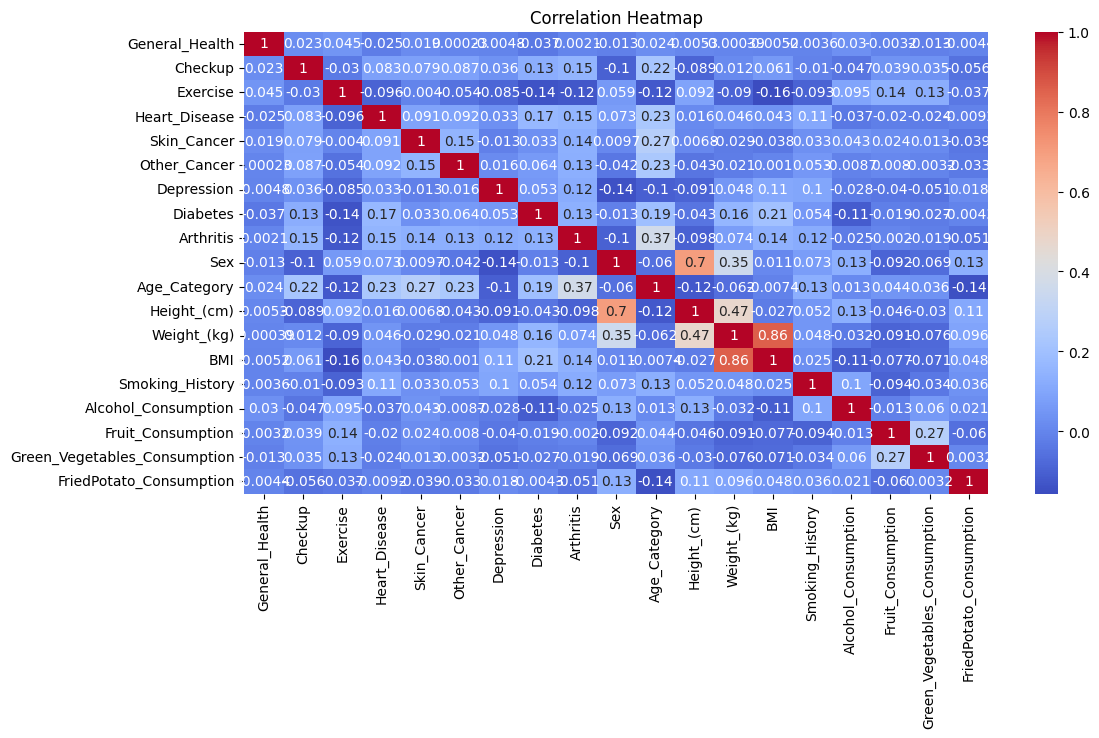

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:

range_values = data.max() - data.min()
range_values


General_Health                    6.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     1.00
Skin_Cancer                       1.00
Other_Cancer                      1.00
Depression                        1.00
Diabetes                          3.00
Arthritis                         1.00
Sex                               4.00
Age_Category                     12.00
Height_(cm)                     150.00
Weight_(kg)                     268.07
BMI                              87.31
Smoking_History                   1.00
Alcohol_Consumption              30.00
Fruit_Consumption               120.00
Green_Vegetables_Consumption    128.00
FriedPotato_Consumption         128.00
dtype: float64

In [14]:
variance = data.var()
variance

General_Health                    3.758952
Checkup                           1.039535
Exercise                          0.174341
Heart_Disease                     0.074314
Skin_Cancer                       0.087683
Other_Cancer                      0.087380
Depression                        0.160253
Diabetes                          0.524731
Arthritis                         0.220157
Sex                               0.998695
Age_Category                     12.415232
Height_(cm)                     113.593519
Weight_(kg)                     455.532603
BMI                              42.540699
Smoking_History                   0.241085
Alcohol_Consumption              67.236105
Fruit_Consumption               618.802210
Green_Vegetables_Consumption    222.792593
FriedPotato_Consumption          73.667103
dtype: float64

In [15]:
std_dev = data.std()
std_dev

General_Health                   1.938802
Checkup                          1.019576
Exercise                         0.417542
Heart_Disease                    0.272606
Skin_Cancer                      0.296113
Other_Cancer                     0.295602
Depression                       0.400316
Diabetes                         0.724383
Arthritis                        0.469208
Sex                              0.999347
Age_Category                     3.523526
Height_(cm)                     10.658026
Weight_(kg)                     21.343210
BMI                              6.522323
Smoking_History                  0.491004
Alcohol_Consumption              8.199763
Fruit_Consumption               24.875735
Green_Vegetables_Consumption    14.926238
FriedPotato_Consumption          8.582954
dtype: float64

In [16]:
covariance = data.cov()
covariance

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,3.758952,0.044577,0.036457,-0.013006,0.010865,0.000133,-0.003754,-0.051942,0.001934,-0.026058,0.163730,0.109756,-0.016244,-0.066078,-0.003443,0.469414,-0.153868,-0.384388,-0.072433
Checkup,0.044577,1.039535,-0.012665,0.023203,0.023937,0.026144,0.014543,0.094397,0.071838,-0.101941,0.801370,-0.966675,0.261289,0.404769,-0.005079,-0.390221,0.997013,0.531648,-0.487630
Exercise,0.036457,-0.012665,0.174341,-0.010967,-0.000493,-0.006713,-0.014162,-0.041322,-0.024453,0.024761,-0.179996,0.407716,-0.803333,-0.424178,-0.019127,0.325115,1.420763,0.779056,-0.132348
Heart_Disease,-0.013006,0.023203,-0.010967,0.074314,0.007333,0.007445,0.003549,0.032828,0.019687,0.019773,0.219973,0.045849,0.266915,0.075862,0.014429,-0.081742,-0.135996,-0.097832,-0.021589
Skin_Cancer,0.010865,0.023937,-0.000493,0.007333,0.087683,0.013202,-0.001543,0.007072,0.018920,0.002862,0.283872,0.021500,-0.182987,-0.072654,0.004773,0.103835,0.177690,0.056886,-0.098913
Other_Cancer,0.000133,0.026144,-0.006713,0.007445,0.013202,0.087380,0.001881,0.013682,0.017942,-0.012422,0.244203,-0.136918,-0.133324,0.002019,0.007755,-0.020998,0.058633,-0.014284,-0.084481
Depression,-0.003754,0.014543,-0.014162,0.003549,-0.001543,0.001881,0.160253,0.015414,0.022840,-0.056583,-0.145522,-0.389614,0.409570,0.286157,0.019710,-0.092352,-0.397755,-0.305752,0.062321
Diabetes,-0.051942,0.094397,-0.041322,0.032828,0.007072,0.013682,0.015414,0.524731,0.045507,-0.009523,0.492080,-0.332734,2.446166,0.970094,0.019128,-0.678260,-0.344164,-0.295682,-0.026439
Arthritis,0.001934,0.071838,-0.024453,0.019687,0.018920,0.017942,0.022840,0.045507,0.220157,-0.046911,0.613358,-0.489025,0.742105,0.422216,0.028382,-0.095786,-0.023485,-0.131841,-0.205228
Sex,-0.026058,-0.101941,0.024761,0.019773,0.002862,-0.012422,-0.056583,-0.009523,-0.046911,0.998695,-0.212109,7.435943,7.550663,0.071628,0.036008,1.059411,-2.298316,-1.032126,1.115633


In [17]:
correlation = data.corr()
correlation

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.022551,0.045035,-0.024608,0.018925,0.000232,-0.004836,-0.036984,0.002126,-0.013449,0.023967,0.005312,-0.000393,-0.005225,-0.003617,0.029527,-0.003190,-0.013283,-0.004353
Checkup,0.022551,1.000000,-0.029750,0.083480,0.079285,0.086747,0.035632,0.127812,0.150166,-0.100050,0.223067,-0.088958,0.012007,0.060868,-0.010145,-0.046676,0.039310,0.034934,-0.055723
Exercise,0.045035,-0.029750,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.136618,-0.124813,0.059341,-0.122345,0.091618,-0.090144,-0.155756,-0.093295,0.094959,0.136787,0.125002,-0.036930
Heart_Disease,-0.024608,0.083480,-0.096347,1.000000,0.090848,0.092387,0.032526,0.166241,0.153913,0.072581,0.229011,0.015780,0.045875,0.042666,0.107797,-0.036569,-0.020055,-0.024043,-0.009227
Skin_Cancer,0.018925,0.079285,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.032968,0.136178,0.009671,0.272074,0.006812,-0.028954,-0.037619,0.032828,0.042764,0.024123,0.012871,-0.038919
Other_Cancer,0.000232,0.086747,-0.054388,0.092387,0.150824,1.000000,0.015892,0.063898,0.129362,-0.042049,0.234459,-0.043459,-0.021132,0.001047,0.053431,-0.008663,0.007974,-0.003237,-0.033298
Depression,-0.004836,0.035632,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.053155,0.121598,-0.141437,-0.103169,-0.091318,0.047936,0.109597,0.100275,-0.028135,-0.039943,-0.051170,0.018138
Diabetes,-0.036984,0.127812,-0.136618,0.166241,0.032968,0.063898,0.053155,1.000000,0.133890,-0.013155,0.192792,-0.043098,0.158219,0.205326,0.053780,-0.114190,-0.019099,-0.027347,-0.004252
Arthritis,0.002126,0.150166,-0.124813,0.153913,0.136178,0.129362,0.121598,0.133890,1.000000,-0.100045,0.370997,-0.097789,0.074104,0.137964,0.123196,-0.024896,-0.002012,-0.018825,-0.050961
Sex,-0.013449,-0.100050,0.059341,0.072581,0.009671,-0.042049,-0.141437,-0.013155,-0.100045,1.000000,-0.060237,0.698141,0.354005,0.010989,0.073384,0.129285,-0.092452,-0.069194,0.130067


#Dataset Overview:

##The data DataFrame likely contains at least two columns: "Sex" and "BMI".
##"Sex" is expected to represent the gender of the individuals (typically values like "Male" and "Female").
##"BMI" represents the Body Mass Index of individuals.
#Key Features:

##Boxplot: This plot shows the distribution of BMI for each gender category ("Male" vs "Female") in the dataset.
##X-axis ("Sex"): Represents the two categories of sex (or gender).
##Y-axis ("BMI"): Represents the BMI values.
##Box: The box represents the interquartile range (IQR), with the median BMI as the line inside the box.
##Whiskers: Extend to the minimum and maximum values that are within 1.5 times the IQR from the first and third quartiles.
##Outliers: Data points that fall outside of the whiskers are considered outliers and typically shown as dots.

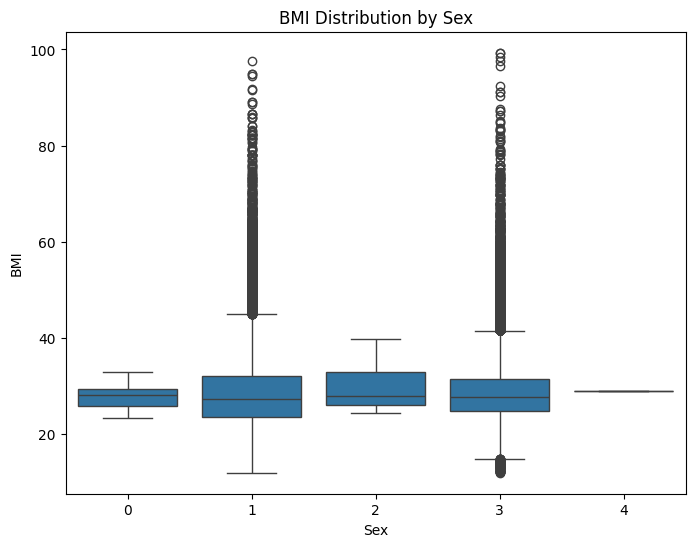

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="BMI", data=data)
plt.title("BMI Distribution by Sex")
plt.show()

# Dataset Overview:

## The data DataFrame likely includes a column called "Age_Category", which categorizes individuals into different age groups.
## The exact age categories might depend on the dataset but typically could be something like "18-24", "25-34", "35-44", etc.
# Key Features:

## Countplot: This plot is used to display the count of observations in each categorical bin (in this case, each age category).
## X-axis ("Age_Category"): Represents the different age groups.
## Y-axis: Shows the number of individuals in each age category.
## Bars: Each bar's height represents the number of occurrences of a specific age category.


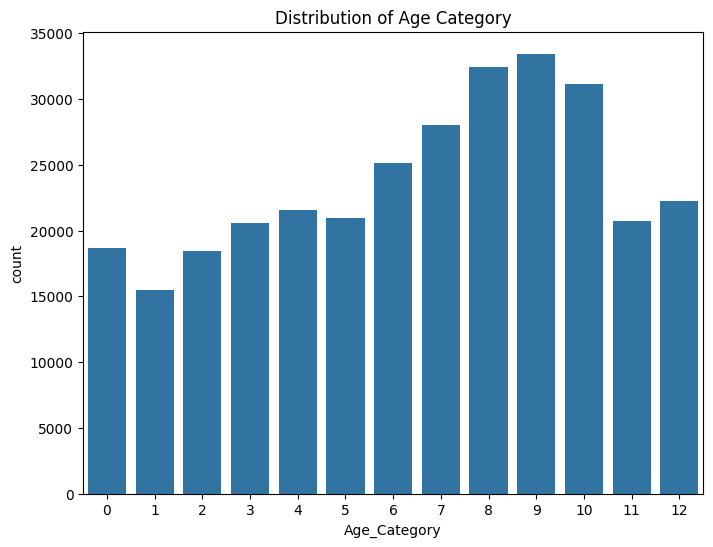

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Age_Category", data=data)
plt.title("Distribution of Age Category")
plt.show()


# Dataset Overview:

## data: A pandas DataFrame containing various columns, with "BMI" being the target variable you're trying to predict.
## "BMI": This is the target variable that you aim to predict using the other columns in the dataset.
# Feature Variables (X):

## X contains all the columns from the original dataset except "BMI". These are the features that will be used to predict the target variable.
## The features might include demographic or medical attributes like "Age", "Sex", "Height", "Weight", or other factors depending on the dataset.
# Target Variable (y):

## y is the "BMI" column, which is the variable you're trying to predict using machine learning algorithms.

In [20]:
X = data.drop("BMI", axis=1)
y = data["BMI"]

# Dataset Overview:

## X: Contains the feature variables (all columns except "BMI").
## y: Contains the target variable ("BMI").
# Data Splitting:

## Training Set (X_train, y_train): This is the subset of the data used to train machine learning models. It consists of 80% of the original dataset (since test_size=0.2).
## X_train: Features for the training set.
## y_train: Target variable for the training set.
## Testing Set (X_test, y_test): This is the subset of the data used to evaluate the performance of the model. It consists of 20% of the original dataset.
## X_test: Features for the testing set.
## y_test: Target variable for the testing set.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print("\nData Preprocessing Complete. Ready for Modeling!")


Data Preprocessing Complete. Ready for Modeling!


In [23]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    mean_val = data[col].mean()       
    median_val = data[col].median()   
    mode_val = data[col].mode()[0]   
    print(f"Feature: {col}")
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}\n")

Feature: General_Health
  Mean: 2.6674091965783187
  Median: 2.0
  Mode: 5

Feature: Checkup
  Mean: 3.5150686084687264
  Median: 4.0
  Mode: 4

Feature: Exercise
  Mean: 0.7750620034061401
  Median: 1.0
  Mode: 1

Feature: Heart_Disease
  Mean: 0.08085049894124732
  Median: 0.0
  Mode: 0

Feature: Skin_Cancer
  Mean: 0.09711384667189028
  Median: 0.0
  Mode: 0

Feature: Other_Cancer
  Mean: 0.09673826468169426
  Median: 0.0
  Mode: 0

Feature: Depression
  Mean: 0.20042155840623724
  Median: 0.0
  Mode: 0

Feature: Diabetes
  Mean: 0.3081585474042752
  Median: 0.0
  Mode: 0

Feature: Arthritis
  Mean: 0.32724523561294333
  Median: 0.0
  Mode: 0

Feature: Sex
  Mean: 1.962597214217721
  Median: 1.0
  Mode: 1

Feature: Age_Category
  Mean: 6.535887506718384
  Median: 7.0
  Mode: 9

Feature: Height_(cm)
  Mean: 170.61524862880196
  Median: 170.0
  Mode: 168.0

Feature: Weight_(kg)
  Mean: 83.58865454227563
  Median: 81.65
  Mode: 90.72

Feature: BMI
  Mean: 28.62621053960772
  Median: 27

In [24]:
for col in data.columns:
    print(f"Feature: {col}")

    # If column is numeric
    if data[col].dtype in [np.int64, np.float64]:  
        mean_val = data[col].mean()
        median_val = data[col].median()
        mode_val = data[col].mode()[0] if not data[col].mode().empty else "No Mode"

        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")
        print(f"  Mode: {mode_val}")

    # If column is categorical
    else:
        mode_val = data[col].mode()[0] if not data[col].mode().empty else "No Mode"
        print(f"  Mode: {mode_val} (Most Frequent Category)")

    print("-" * 40) 

Feature: General_Health
  Mode: 5 (Most Frequent Category)
----------------------------------------
Feature: Checkup
  Mode: 4 (Most Frequent Category)
----------------------------------------
Feature: Exercise
  Mode: 1 (Most Frequent Category)
----------------------------------------
Feature: Heart_Disease
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Skin_Cancer
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Other_Cancer
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Depression
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Diabetes
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Arthritis
  Mode: 0 (Most Frequent Category)
----------------------------------------
Feature: Sex
  Mode: 1 (Most Frequent Category)
----------------------------------------
Feature: Age_Category
  Mode: 9 (Most Frequen

In [25]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Check outliers for all numeric columns
for col in data.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"Feature: {col}, Outliers Found: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]].head())  # Show sample outliers
    print("-" * 40)

Feature: General_Health, Outliers Found: 0
----------------------------------------
Feature: Checkup, Outliers Found: 69483
    Checkup
0         2
14        2
20        2
22        0
23        2
----------------------------------------
Feature: Exercise, Outliers Found: 69473
   Exercise
0         0
1         0
4         0
5         0
8         0
----------------------------------------
Feature: Heart_Disease, Outliers Found: 24971
    Heart_Disease
1               1
3               1
6               1
10              1
11              1
----------------------------------------
Feature: Skin_Cancer, Outliers Found: 29994
    Skin_Cancer
11            1
13            1
19            1
24            1
32            1
----------------------------------------
Feature: Other_Cancer, Outliers Found: 29878
    Other_Cancer
19             1
21             1
24             1
25             1
35             1
----------------------------------------
Feature: Depression, Outliers Found: 61901
  

In [26]:

print(data['Checkup'].value_counts())
print(data['Exercise'].value_counts())
print(data['Heart_Disease'].value_counts())

Checkup
4    239371
2     37213
3     17442
0     13421
1      1407
Name: count, dtype: int64
Exercise
1    239381
0     69473
Name: count, dtype: int64
Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


In [27]:
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25) 
        Q3 = data[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
    
    return outliers

outliers_before = detect_outliers_iqr(data)
print("Outliers before replacement:", outliers_before)

for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = data[col].median()
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median_value, data[col])
outliers_after = detect_outliers_iqr(data)
print("Outliers after replacement:", outliers_after)

Outliers before replacement: {'General_Health': [], 'Checkup': [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 1, 3, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 3, 2, 0, 0, 1, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 0, 2, 3, 0, 2, 3, 2, 2, 0, 3, 2, 2, 3, 0, 2, 3, 2, 2, 0, 0, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 3, 2, 1, 2, 2, 2, 0, 0, 3, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 3, 3, 3, 2, 0, 2, 2, 3, 3, 2, 3, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 0, 3, 2, 2, 0, 1, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 

In [28]:
data['Checkup'] = data['Checkup'].fillna(data['Checkup'].median())
data['Exercise'] = data['Exercise'].fillna(data['Exercise'].median())

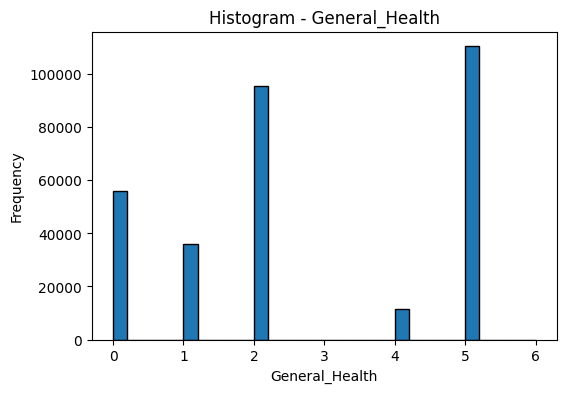

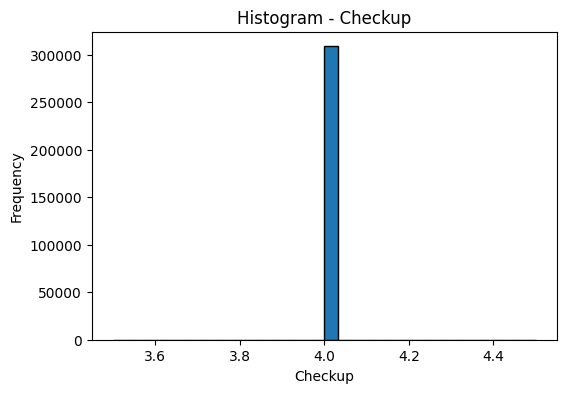

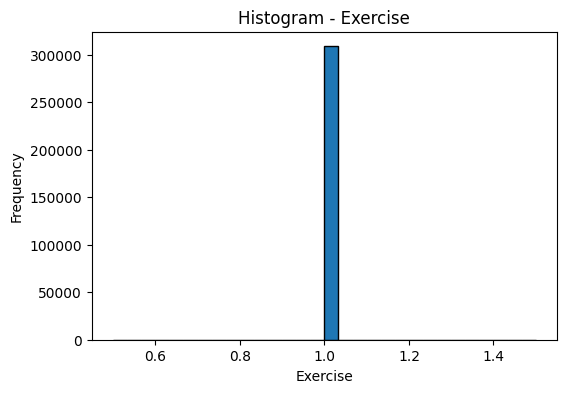

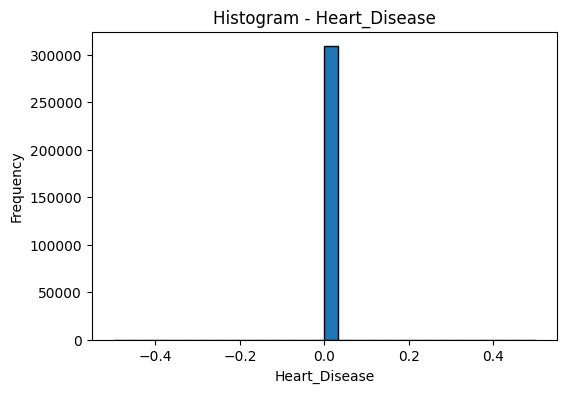

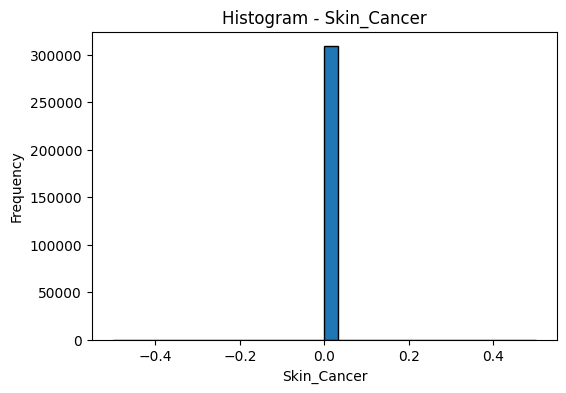

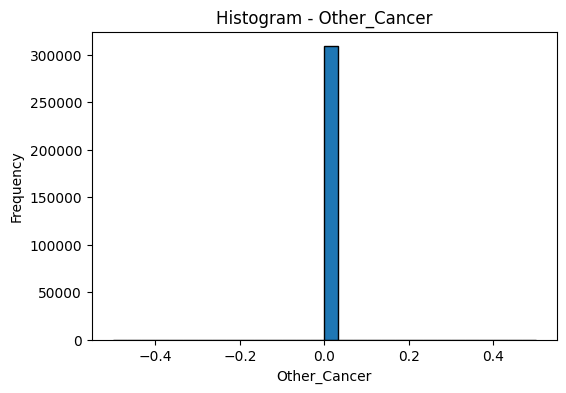

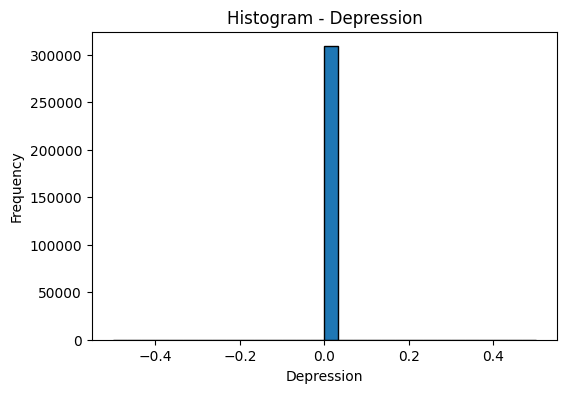

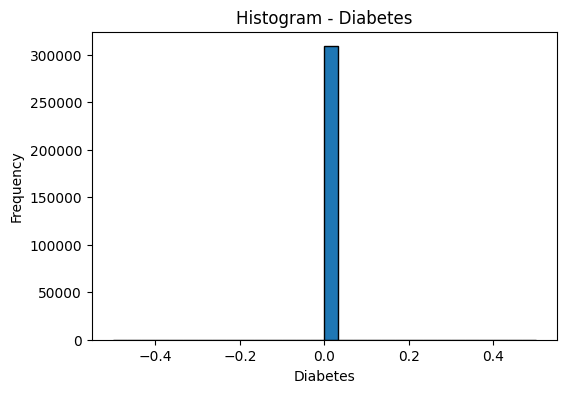

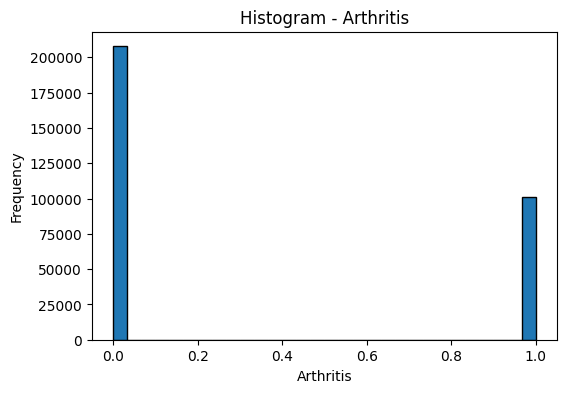

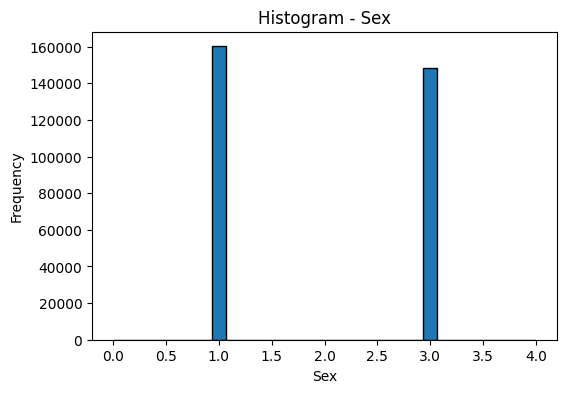

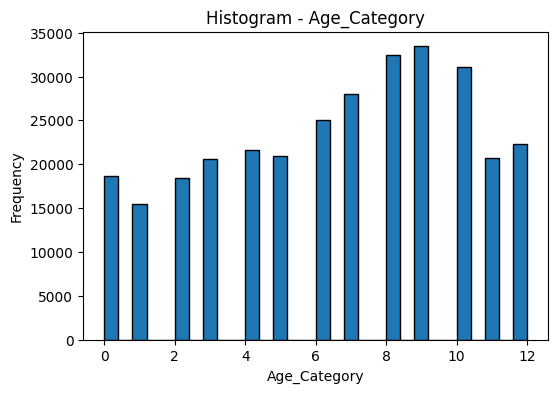

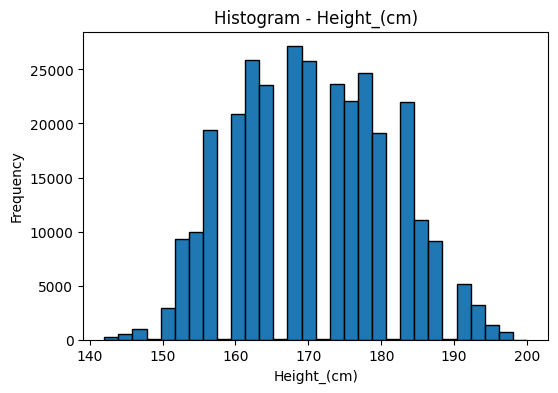

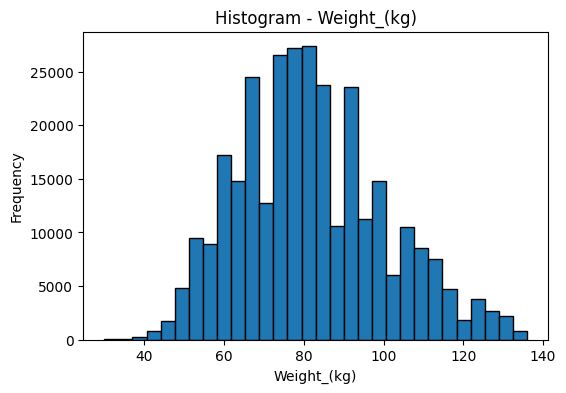

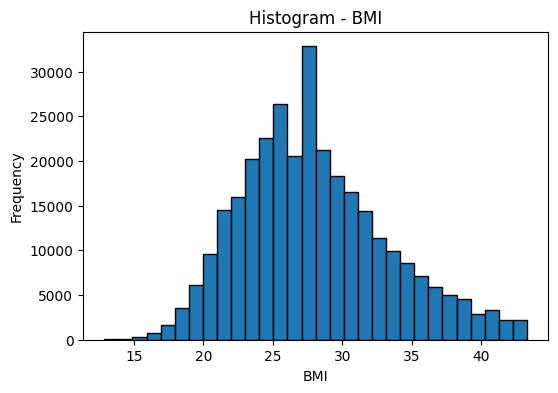

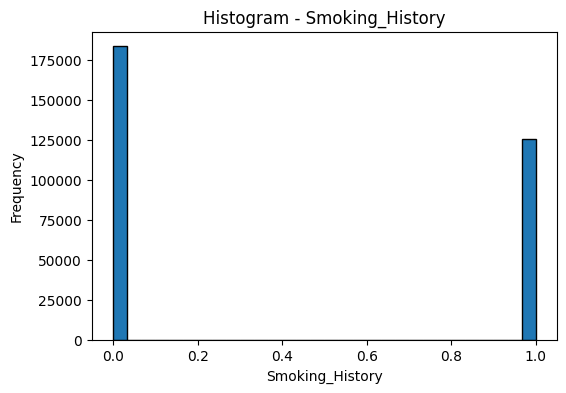

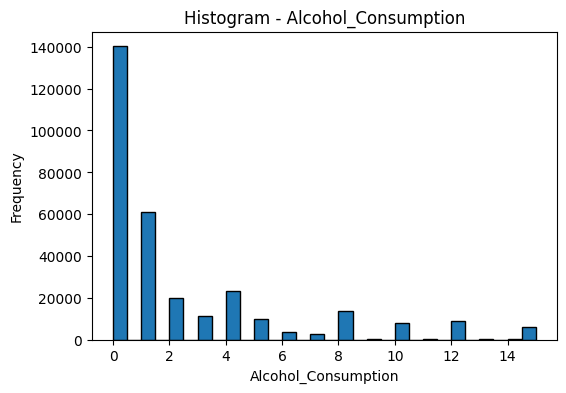

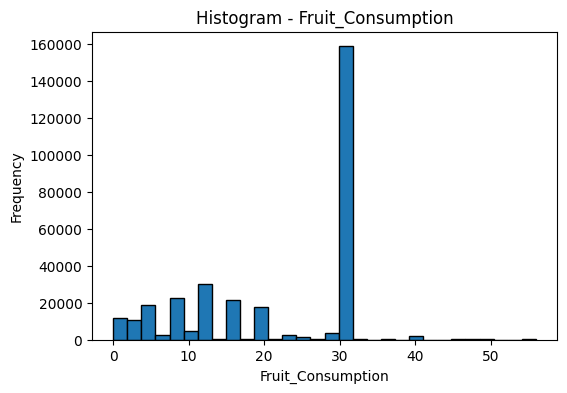

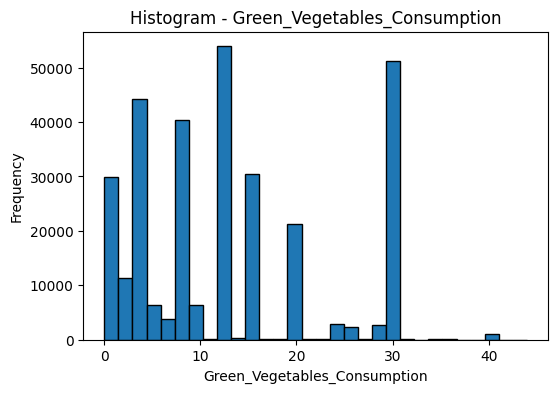

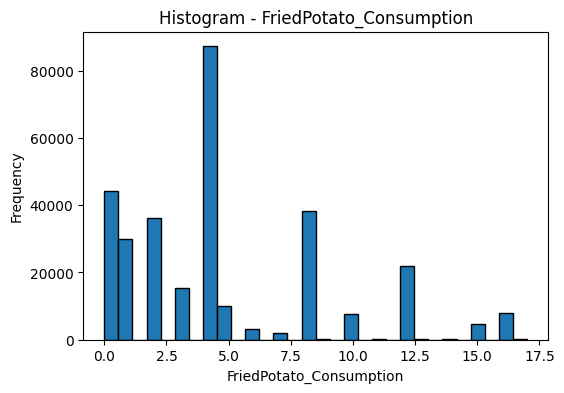

In [29]:
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, edgecolor='black')
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [53]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])


In [54]:
scaler = StandardScaler() 
data[data.columns] = scaler.fit_transform(data)

In [56]:
X = data.drop(columns=['target'])  # Replace 'target' with your actual target column
y = data['target']

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 best features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
data = data[selected_features]


KeyError: "['target'] not found in axis"

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_standard = data.copy()
data_scaled_standard[data.columns] = scaler.fit_transform(data)

print("Standardized Data:\n", data_scaled_standard.head())

Standardized Data:
    General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0        0.171545      0.0       0.0            0.0          0.0   
1        1.203111      0.0       0.0            0.0          0.0   
2        1.203111      0.0       0.0            0.0          0.0   
3        0.687328      0.0       0.0            0.0          0.0   
4       -0.344239      0.0       0.0            0.0          0.0   

   Other_Cancer  Depression  Diabetes  Arthritis       Sex  Age_Category  \
0           0.0         0.0       0.0   1.433810 -0.963228      0.983140   
1           0.0         0.0       0.0  -0.697442 -0.963228      0.983140   
2           0.0         0.0       0.0  -0.697442 -0.963228      0.415526   
3           0.0         0.0       0.0  -0.697442  1.038082      1.266947   
4           0.0         0.0       0.0  -0.697442  1.038082      1.550754   

   Height_(cm)  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0    -1.978176    -2.684377 -2.5372

In [31]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_standard = data.copy()
data_scaled_standard[data.columns] = scaler.fit_transform(data)

print("Standardized Data:\n", data_scaled_standard.head())




















































































Standardized Data:
    General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0        0.171545      0.0       0.0            0.0          0.0   
1        1.203111      0.0       0.0            0.0          0.0   
2        1.203111      0.0       0.0            0.0          0.0   
3        0.687328      0.0       0.0            0.0          0.0   
4       -0.344239      0.0       0.0            0.0          0.0   

   Other_Cancer  Depression  Diabetes  Arthritis       Sex  Age_Category  \
0           0.0         0.0       0.0   1.433810 -0.963228      0.983140   
1           0.0         0.0       0.0  -0.697442 -0.963228      0.983140   
2           0.0         0.0       0.0  -0.697442 -0.963228      0.415526   
3           0.0         0.0       0.0  -0.697442  1.038082      1.266947   
4           0.0         0.0       0.0  -0.697442  1.038082      1.550754   

   Height_(cm)  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0    -1.978176    -2.684377 -2.5372

In [32]:
data_transformed_log = data.copy()
data_transformed_log[data.columns] = np.log1p(data)  

print("Log Transformed Data:\n", data_transformed_log.head())

Log Transformed Data:
    General_Health   Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0        1.386294  1.609438  0.693147            0.0          0.0   
1        1.791759  1.609438  0.693147            0.0          0.0   
2        1.791759  1.609438  0.693147            0.0          0.0   
3        1.609438  1.609438  0.693147            0.0          0.0   
4        1.098612  1.609438  0.693147            0.0          0.0   

   Other_Cancer  Depression  Diabetes  Arthritis       Sex  Age_Category  \
0           0.0         0.0       0.0   0.693147  0.693147      2.397895   
1           0.0         0.0       0.0   0.000000  0.693147      2.397895   
2           0.0         0.0       0.0   0.000000  0.693147      2.197225   
3           0.0         0.0       0.0   0.000000  1.386294      2.484907   
4           0.0         0.0       0.0   0.000000  1.386294      2.564949   

   Height_(cm)  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0     5.017280     3.51631

In [33]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled_robust = data.copy()
data_scaled_robust[data.columns] = scaler.fit_transform(data)

print("Robust Scaled Data:\n", data_scaled_robust.head())

Robust Scaled Data:
    General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0            0.25      0.0       0.0            0.0          0.0   
1            0.75      0.0       0.0            0.0          0.0   
2            0.75      0.0       0.0            0.0          0.0   
3            0.50      0.0       0.0            0.0          0.0   
4            0.00      0.0       0.0            0.0          0.0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0           0.0         0.0       0.0        1.0  0.0           0.6   
1           0.0         0.0       0.0        0.0  0.0           0.6   
2           0.0         0.0       0.0        0.0  0.0           0.2   
3           0.0         0.0       0.0        0.0  1.0           0.8   
4           0.0         0.0       0.0        0.0  1.0           1.0   

   Height_(cm)  Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  \
0    -1.333333    -1.963527 -1.853448              1.0          

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print(data_scaled)

        General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0             0.171545      0.0       0.0            0.0          0.0   
1             1.203111      0.0       0.0            0.0          0.0   
2             1.203111      0.0       0.0            0.0          0.0   
3             0.687328      0.0       0.0            0.0          0.0   
4            -0.344239      0.0       0.0            0.0          0.0   
...                ...      ...       ...            ...          ...   
308849        1.203111      0.0       0.0            0.0          0.0   
308850       -0.860022      0.0       0.0            0.0          0.0   
308851        1.203111      0.0       0.0            0.0          0.0   
308852        1.203111      0.0       0.0            0.0          0.0   
308853       -1.375805      0.0       0.0            0.0          0.0   

        Other_Cancer  Depression  Diabetes  Arthritis       Sex  Age_Category  \
0                0.0         0.0       0.0

In [35]:
print(data['General_Health'].unique())

[3. 5. 4. 2. 1. 0. 6.]


In [36]:

print(data['General_Health'].value_counts())


General_Health
5.0    110395
2.0     95364
0.0     55954
1.0     35810
4.0     11322
3.0         5
6.0         4
Name: count, dtype: int64


In [37]:
data['General_Health'] = data['General_Health'].apply(lambda x: 1 if x > 0 else 0)

In [38]:

print(data['General_Health'].value_counts())

General_Health
1    252900
0     55954
Name: count, dtype: int64


In [39]:
X = data.drop(columns=['General_Health'])  
y = data['General_Health']  

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (216197, 18) (216197,)
Testing set shape: (92657, 18) (92657,)


In [41]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [42]:

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression:
Accuracy: 0.8184810645714841
              precision    recall  f1-score   support

           0       0.48      0.02      0.04     16786
           1       0.82      1.00      0.90     75871

    accuracy                           0.82     92657
   macro avg       0.65      0.51      0.47     92657
weighted avg       0.76      0.82      0.74     92657

Confusion Matrix:
 [[  343 16443]
 [  376 75495]]


In [46]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print(" Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


 Decision Tree Results:
Accuracy: 0.7179813721575272
              precision    recall  f1-score   support

           0       0.25      0.29      0.27     16786
           1       0.84      0.81      0.83     75871

    accuracy                           0.72     92657
   macro avg       0.55      0.55      0.55     92657
weighted avg       0.73      0.72      0.72     92657

Confusion Matrix:
 [[ 4816 11970]
 [14161 61710]]


In [47]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🔹 Random Forest Results:
Accuracy: 0.8091995208133222
              precision    recall  f1-score   support

           0       0.39      0.10      0.16     16786
           1       0.83      0.97      0.89     75871

    accuracy                           0.81     92657
   macro avg       0.61      0.53      0.52     92657
weighted avg       0.75      0.81      0.76     92657

Confusion Matrix:
 [[ 1644 15142]
 [ 2537 73334]]


In [48]:
print("\n🔎 Model Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")



🔎 Model Comparison:
Logistic Regression Accuracy: 0.8185
Decision Tree Accuracy: 0.7180
Random Forest Accuracy: 0.8092


In [49]:
!pip install xgboost


In [50]:
from xgboost import XGBClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n🔹 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🔹 XGBoost Results:
Accuracy: 0.8202510333811801
              precision    recall  f1-score   support

           0       0.57      0.03      0.06     16786
           1       0.82      0.99      0.90     75871

    accuracy                           0.82     92657
   macro avg       0.69      0.51      0.48     92657
weighted avg       0.78      0.82      0.75     92657

Confusion Matrix:
 [[  555 16231]
 [  424 75447]]


In [51]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


XGBoost Accuracy: 0.8203
